<a href="https://colab.research.google.com/github/jadsomjose/data_well/blob/main/knn_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/jadsomjose/data_well.git

Cloning into 'data_well'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 64 (delta 18), reused 54 (delta 14), pack-reused 0
Unpacking objects: 100% (64/64), done.


In [3]:
pip install lasio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 56 kB/s 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import lasio

plt.style.use('ggplot')

In [5]:
norne1 = lasio.read('data_well/dado_norne/660810-B-4AH.las').df()
norne2 = lasio.read('data_well/dado_norne/660810-C-1H.las').df()
norne3 = lasio.read('data_well/dado_norne/660810-C-2H.las').df()
norne4 = lasio.read('data_well/dado_norne/660810-C-3H.las').df()
norne5 = lasio.read('data_well/dado_norne/660810-C-4AH.las').df()
norne6 = lasio.read('data_well/dado_norne/660810-D-4H.las').df()
norne7 = lasio.read('data_well/dado_norne/660810-E-3H.las').df()



norne1 = norne1.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS'])
norne2 = norne2.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS'])
norne3 = norne3.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS'])
norne4 = norne4.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS'])
norne5 = norne5.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS'])
norne6 = norne6.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS'])
norne7 = norne7.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS'])


In [6]:
X1 = norne1.loc[:, ['DT']]#, 'NPHI', 'VSH']]
X2 = norne2.loc[:, ['DT']]#, 'NPHI', 'VSH']]
X3 = norne3.loc[:, ['DT']]#, 'NPHI', 'VSH']]
X4 = norne4.loc[:, ['DT']]#, 'NPHI', 'VSH']]
X5 = norne5.loc[:, ['DT']]#, 'NPHI', 'VSH']]
X6 = norne6.loc[:, ['DT']]#, 'NPHI', 'VSH']]
X7 = norne7.loc[:, ['DT']]#, 'NPHI', 'VSH']]

depth1 = norne1.index
depth2 = norne2.index

y1 = norne1.loc[:, ['DTS']]
y2 = norne2.loc[:, ['DTS']]
y3 = norne3.loc[:, ['DTS']]
y4 = norne4.loc[:, ['DTS']]
y5 = norne5.loc[:, ['DTS']]
y6 = norne6.loc[:, ['DTS']]
y7 = norne7.loc[:, ['DTS']]

# Definir quem é poço cego e quem é poço de treinamento

X_ref = X1 #pd.concat([X2, X3])#, X4, X5, X6, X7])
y_ref = y1  #pd.concat([y2, y3])# y4, y5, y6, y7])

X_blind = X2 #blind--> validaçÃO
y_blind = y2

Calculo das velocidades

Calculando VP e VS

$V_P=10^3 \frac{0.3048}{\Delta t_P}$ --> km/s


In [7]:
X_ref['VP'] = (0.3048/X_ref['DT'])*10**3
X_blind['VP'] = (0.3048/X_blind['DT'])*10**3

y_ref['VPS'] = (0.3048/y_ref['DTS'])*10**3
y_blind['VPS'] = (0.3048/y_blind['DTS'])*10**3

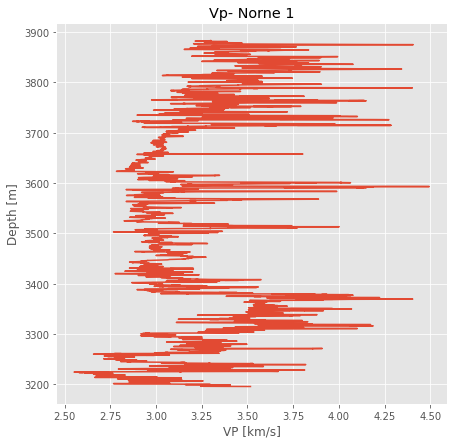

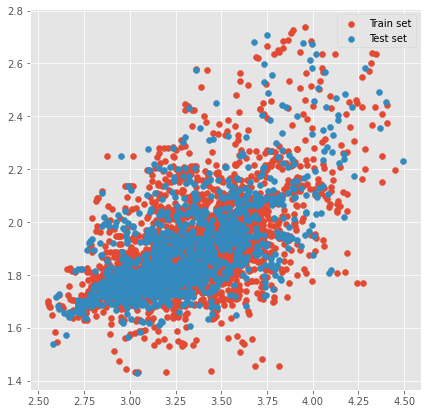

In [8]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('Vp- Norne 1') # Traning Data
ax.set_xlabel("VP [km/s]")
ax.set_ylabel("Depth [m]")

ax.plot(X_ref['VP'],depth1)


x_train, x_test, y_train, y_test = train_test_split(X_ref['VP'],
                                                    y_ref['VPS'],
                                                    test_size = 0.3,
                                                    random_state = 1)


fig = plt.figure(figsize = (7,7))
ax = plt.axes()

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()


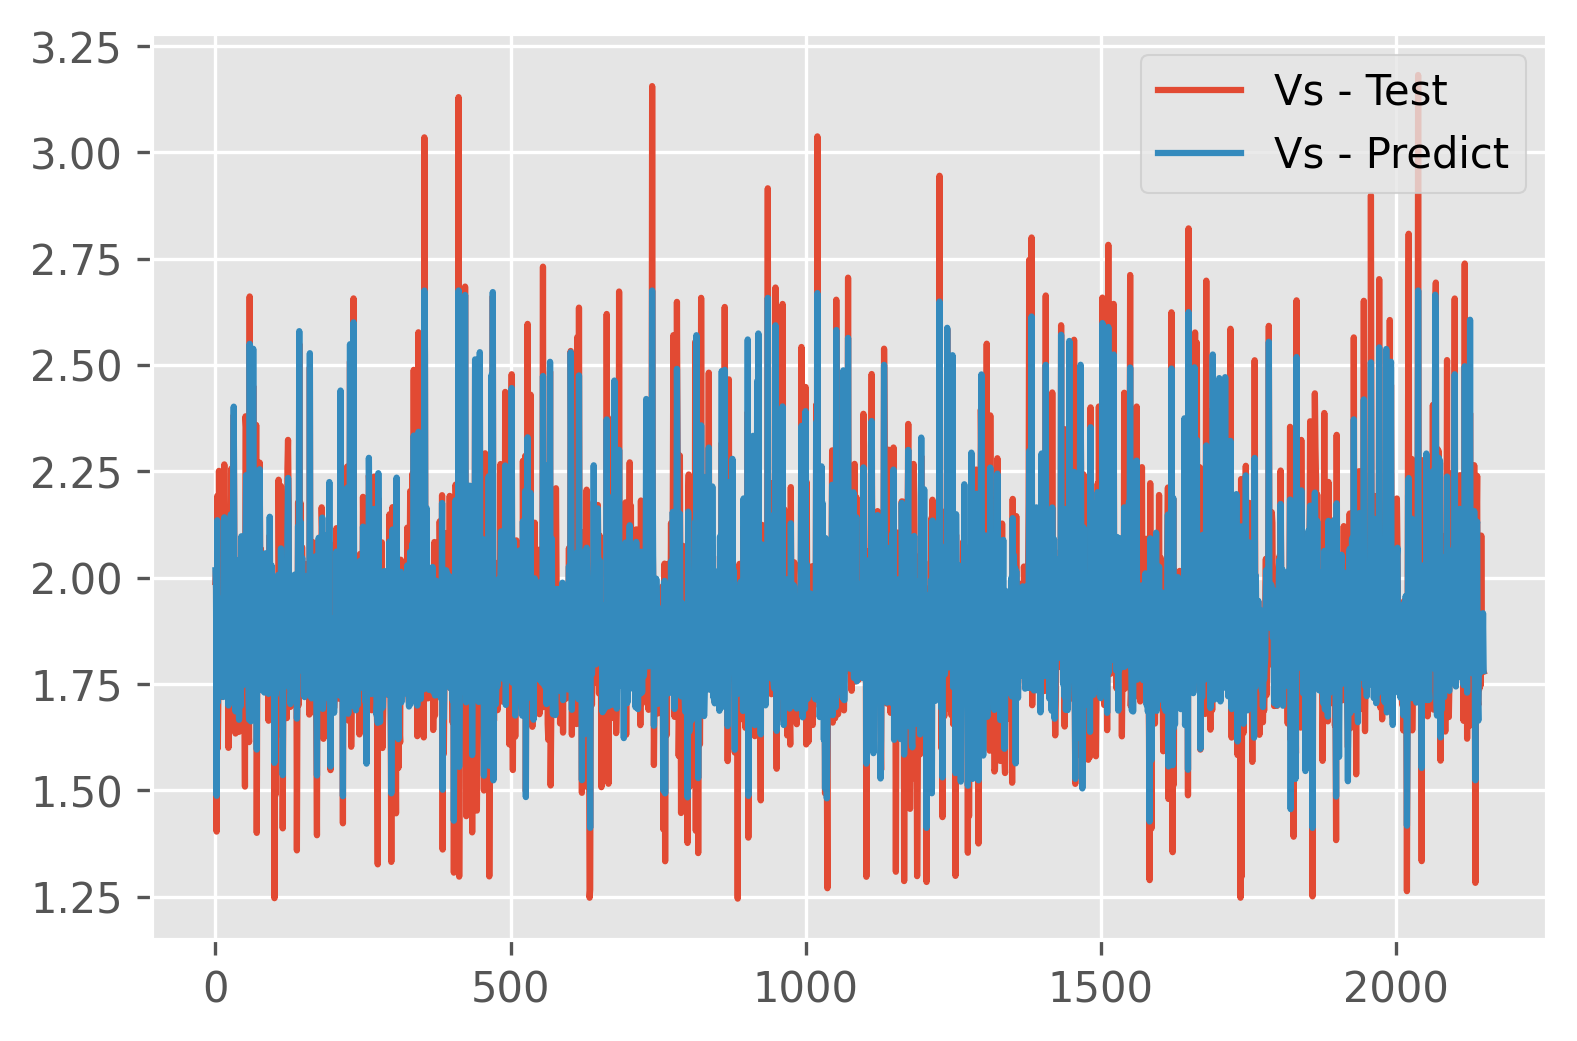

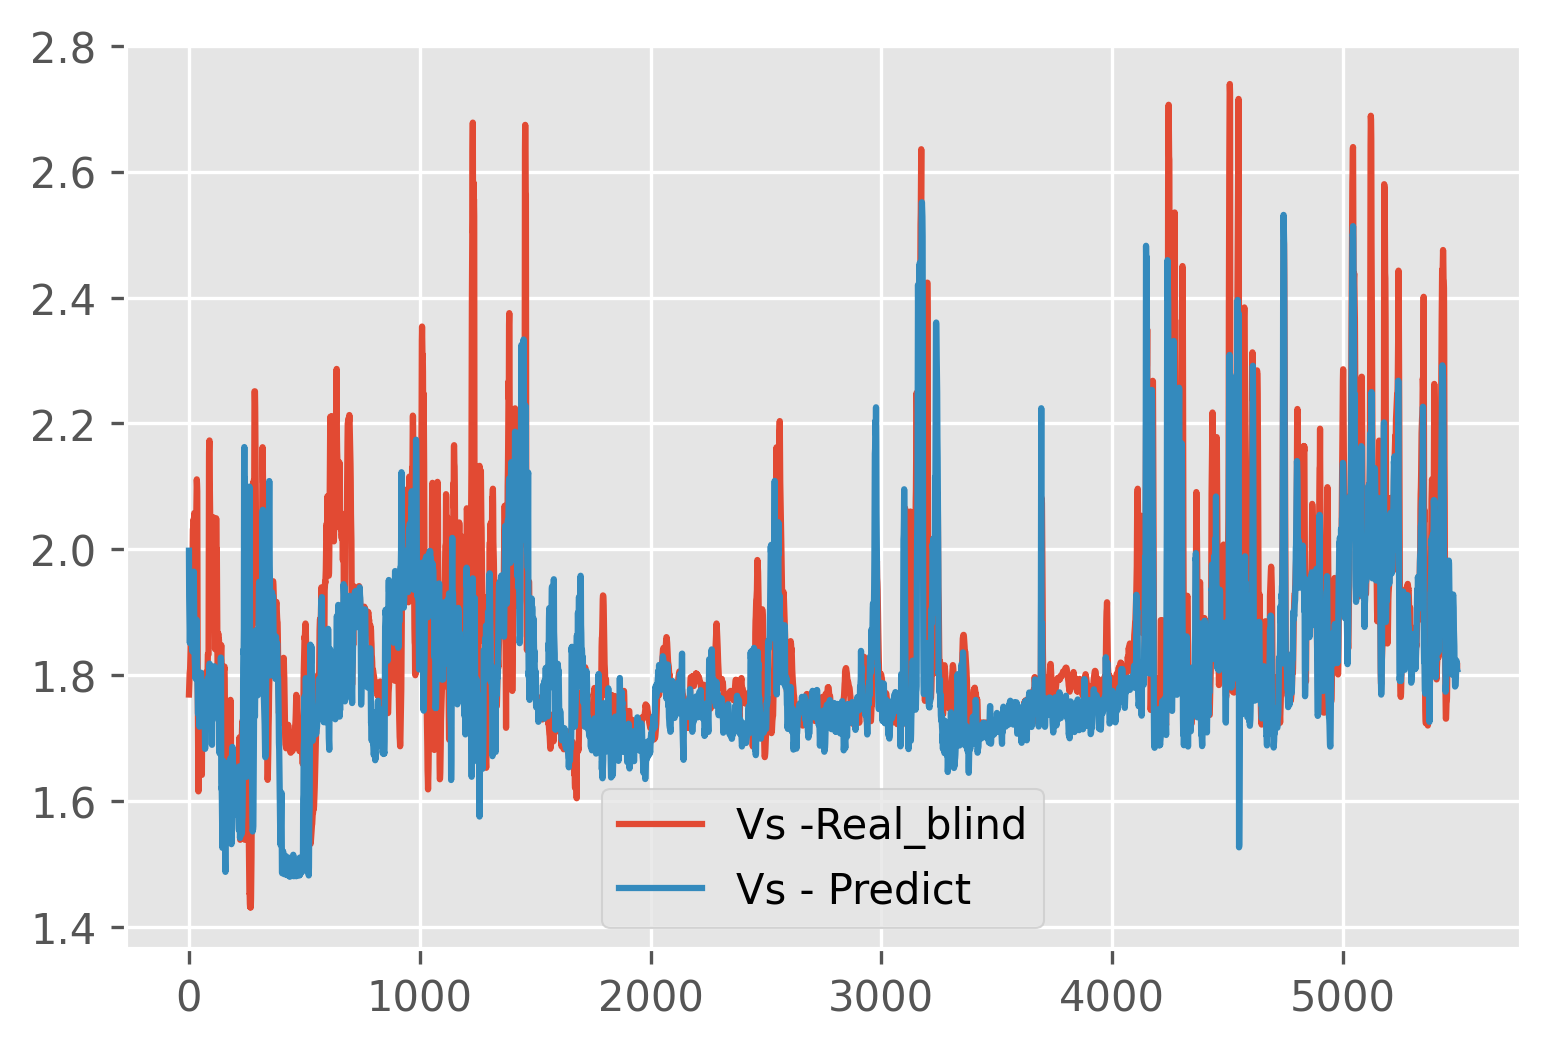

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
import lasio
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor

X1 = norne1.loc[:, ['DT', 'NPHI', 'VSH']]
X2 = norne2.loc[:, ['DT', 'NPHI', 'VSH']]
X3 = norne3.loc[:, ['DT', 'NPHI', 'VSH']]
X4 = norne4.loc[:, ['DT', 'NPHI', 'VSH']]
X5 = norne5.loc[:, ['DT', 'NPHI', 'VSH']]
X6 = norne6.loc[:, ['DT', 'NPHI', 'VSH']]
X7 = norne7.loc[:, ['DT', 'NPHI', 'VSH']]

depth1 = norne1.index
depth2 = norne2.index

y1 = norne1.loc[:, ['DTS']]
y2 = norne2.loc[:, ['DTS']]
y3 = norne3.loc[:, ['DTS']]
y4 = norne4.loc[:, ['DTS']]
y5 = norne5.loc[:, ['DTS']]
y6 = norne6.loc[:, ['DTS']]
y7 = norne7.loc[:, ['DTS']]


X_ref = pd.concat([X2, X3])#, X4, X5, X6, X7])
y_ref = pd.concat([y2, y3])#, y4, y5, y6, y7])

X_blind = X1
y_blind = y1

# DT e DTS---> Vp e Vs

X_ref['VP'] = (0.3048/X_ref['DT'])*10**3
X_blind['VP'] = (0.3048/X_blind['DT'])*10**3

y_ref['VPS'] = (0.3048/y_ref['DTS'])*10**3
y_blind['VPS'] = (0.3048/y_blind['DTS'])*10**3

# Retirar os vetores DT e DTS

X_ref = X_ref.drop(['DT'], axis=1)
X_blind = X_blind.drop(['DT'], axis=1)

y_ref = y_ref.drop(['DTS'], axis=1)
y_blind = y_blind.drop(['DTS'], axis=1)

# Utilizar Robust Scaler para escalonamento

scaler = RobustScaler()

X_ref_sclnd = scaler.fit_transform(X_ref)
X_blind_sclnd = scaler.transform(X_blind)


# Separação dos dados em dados de treino e teste
X_ref_train, X_ref_test, y_train, y_test = train_test_split(X_ref_sclnd, y_ref, test_size=0.3)

## K-Neighbors
neigh_model = KNeighborsRegressor(n_neighbors=55, weights='uniform', metric='minkowski')
neigh_model.fit(X_ref_train, y_train)

y_pred_test = neigh_model.predict(X_ref_test)

y_pred_blid = neigh_model.predict(X_blind_sclnd)


plt.figure(dpi=300)

plt.plot(np.array(y_test), label = 'Vs - Test')
plt.plot(y_pred_test, label = 'Vs - Predict')
plt.legend(loc= 'best')


plt.figure(num=2, dpi=300)
plt.plot(np.array(y_blind), label= 'Vs -Real_blind')
plt.plot(y_pred_blid, label = 'Vs - Predict')
plt.legend(loc= 'best')


In [ ]:


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

msa_pcr= mean_absolute_error(y_test, y_pcr)
r2_score_pcr = pcr.score(X_test,y_test)
mse_pcr = mean_squared_error(y_test, y_pcr)

print('PCR_METRICS: RMSE = {}, MSE = {}, MSA = {}, R2_score = {}'.format(mse_pcr**(1/2), mse_pcr, msa_pcr, r2_score_pcr))

msa_pls= mean_absolute_error(y_test, y_pls)
r2_score_pls = r2_score(y_test,y_pls)
mse_pls = mean_squared_error(y_test, y_pls)

print('PLS_METRICS: RMSE = {}, MSE = {}, MSA = {}, R2_score = {}'.format(mse_pls**(1/2), mse_pls, msa_pls, r2_score_pls))